# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from statsmodels.stats.weightstats import ztest, ttest_ind

sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

## Task 1

#### Solution 1: Conduct a NormalTest from SciPy.stats

In [2]:
# Test the null hypothesis that the temperatures follow a Normal distribution
k2, pval = stats.normaltest(df.temperature)
print('Chi-Squared Statistic: {:f}\np-value: {:f}'.format(k2,pval))

Chi-Squared Statistic: 2.703801
p-value: 0.258748


Since the *p*-value for the test is large (greater than 10%), the null hypothesis cannot be rejected.

#### Solution 2: Examine a histogram of the distribution of temperatures

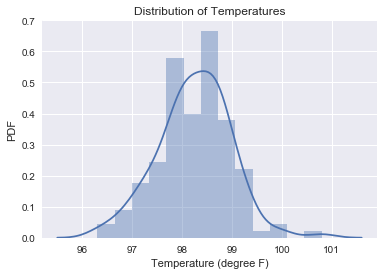

In [3]:
# Inspect PDF for distribution of temperatures 
sns.distplot(df['temperature'])
_ = plt.xlabel('Temperature (degree F)')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of Temperatures')

A visual inspection of the histogram of temperatures shows that the graph is similar to a unimodal bell curve, which further supports that the distribution is Normal.

#### Solution 3: Fit the a theoretical normal distribution to the actual distribution of temperatures

In [4]:
# Calculate mean and standard deviation of the temperatures
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

# Print results
print('Mean of Temperature: {:f} \nStDev of Temperature: {:f}'.format(mean,std))

Mean of Temperature: 98.249231 
StDev of Temperature: 0.730358


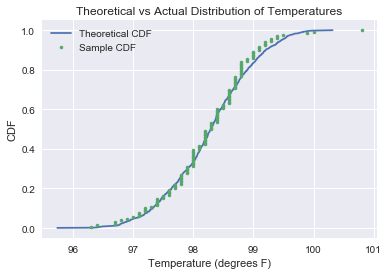

In [5]:
# Create a sample of n = 1000 normally distributed random temperatures
sample = np.random.normal(mean, std, 1000)

# Define empirical cumulative distribution function (ecdf)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute the ecdf for the temperature data and the sample
x,y = ecdf(df['temperature'])
x_theor,y_theor = ecdf(sample)

# Plot and show the actual and theoretical distribution of temperatures
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.xlabel('Temperature (degrees F)')
_ = plt.ylabel('CDF')
_ = plt.title('Theoretical vs Actual Distribution of Temperatures')
_ = plt.legend(['Theoretical CDF','Sample CDF'])
plt.show()

The graph above illustrates that the CDF of the actual temperature data, with n= 130 observations, is a close fit to the CDF of the normally distributed random temperatures with 1000 observations.

## Task 2

In [6]:
# Determine the sample size
df.temperature.size

130

Since there are more than 30 observations of the temperature (n = 130), the sample is sufficiently large.

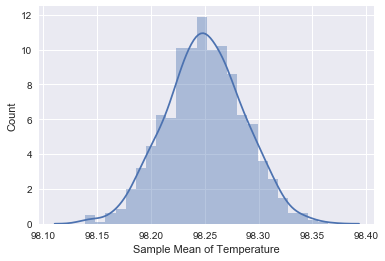

In [7]:
# Define function to calculate mean of random samples
def means_of_samples(n,trials):
    
    # Make a sample of size n
    def sample(n):
        return df['temperature'].sample(n)
    
    # Calculate the mean of the sample
    def stat(sample):
        return sample.mean()
    
    stats = [stat(sample(n)) for i in range(trials)]
    return np.array(stats)

# Calculate mean of 1000 samples of size 100
sample_means = means_of_samples(100,1000)

# Visualize distribution of sample means
sns.distplot(sample_means)
_ = plt.xlabel('Sample Mean of Temperature')
_ = plt.ylabel('Count')
plt.show()

In [8]:
# Compute the standard error
std_err = sample_means.std()

# Compute the 95% confidence interval
conf_interval = np.percentile(sample_means,[2.5,97.5])

# Print summary statistics
print('Standard Error: {}\n95%-Confidence Interval: {}'.format(std_err,conf_interval))

Standard Error: 0.03628537992084435
95%-Confidence Interval: [98.178975 98.319   ]


The standard error is a measure of the variability of sample means between experiments. Given the small value of the standard error and the narrowness of the 95%-C.I., there is sufficent evidence to show that the observations are independent.

## Task 3

#### Solution 1: Bootstrap Hypothesis Test

HYPOTHESIS TEST

$H_0$: The true mean body temperature is 98.6 $^{\circ}$F.

$H_A$: The true mean body temperature is not 98.6 $^{\circ}$F.


In [9]:
# Define a function that creates a bootstrap replicate
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Define a function to generate many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates

In [10]:
# Sort observed temperatures
temps = np.sort(df.temperature)

# Shift the observed temperatures
shifted_temps = temps - np.mean(temps) + 98.6

# Sample 10000 bootstrap replicates of the mean temperature
bs_replicates = draw_bs_reps(shifted_temps, np.mean, 10000)

# Calculate the SEM for observed temperatures
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print('SEM for Observed Temperatures: {:4f}'.format(sem))

# Calculate standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('STD for Bootstrap Replicates: {:4f}'.format(bs_std))

SEM for Observed Temperatures: 0.064057
STD for Bootstrap Replicates: 0.064726


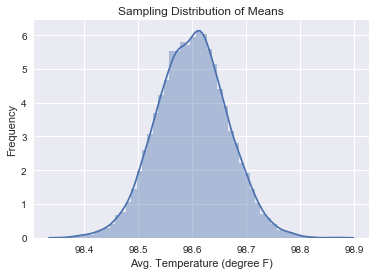

In [11]:
# Inspect histogram of replicates
sns.distplot(bs_replicates)
_ = plt.title('Sampling Distribution of Means')
_ = plt.xlabel('Avg. Temperature (degree F)')
_ = plt.ylabel('Frequency')

In [12]:
# Calculate p-value
bs_pval = np.sum(bs_replicates <= 98.6) / len(bs_replicates)

# Print the p-value
print('p-value = ', bs_pval)

p-value =  0.4981


Since the *p*-value for the test is greater than the alpha threshold ($\alpha$=0.05), the null hypothesis that the true average body temperature is 98.6 $^{\circ}$F cannot be rejected.

#### Solution 2: Frequentist Statistical Test (Student's *t* test)

A one-sample test is appropriate for this procedure given that the goal is to determine whether or not the population mean differs from a fixed value (98.6 $^{\circ}$F), as opposed to the mean of another population. In this situation, it is appropriate to use the Student's *t*-test since the population standard deviation of temperatures is not provided. The null hypothesis will be rejected if the _t_-statistic is more than 1.96 standard deviations away from the mean (i.e. outside the 95% Confidence Interval).

In [13]:
# Perform one-sample t-test
one_sample_data = df.temperature
t_stat, t_pval = stats.ttest_1samp(one_sample_data, 98.6)

# Print results of t-test
print('t-statistic: {:f}\np-value: {}.'.format(abs(t_stat),t_pval))

t-statistic: 5.454823
p-value: 2.4106320415561276e-07.


The results indicate that a mean temperature of 98.6 would be observed at 5.45 standard deviations away from the sample mean. It also follows that the p-value is very small and suggests a low probability of observing a temperature of 98.6 $^{\circ}$F or more. 

#### Solution 3: Frequentist Statistical Test (*z*-test)

In [14]:
# Perform one-sampe z-test
z_score, z_pvalue = ztest(df.temperature,value=98.6)
print(abs(z_score),z_pvalue)

5.4548232923645195 4.9021570141012155e-08


In [15]:
# Sample mean and standard deviation of temperature
x_bar = df.temperature.mean()
sd = df.temperature.std()

# Calculate z-statistic
n = len(df['temperature'])
z_stat = (x_bar-98.6)/(sd/np.sqrt(n))

# Calculate p-value
z_pval = stats.norm.sf(abs(z_stat))

# Print results of z-test
print('z-statistic: {:f}\np-value: {}.'.format(abs(z_stat),z_pval))

z-statistic: 5.454823
p-value: 2.45107850705669e-08.


Both the _t_-test and *z*-test yield the same conclusions given that the sample size consists of 130 observations.

## Task 4

In [16]:
# Draw a random sample of n=10 observations
np.random.seed(13)
r_samp = np.random.choice(df.temperature,size=10)

#### Student's *t*-test with sample

In [17]:
# Perform t-test with sample temperatures
rs_t_stat, rs_t_pval = stats.ttest_1samp(r_samp, 98.6)

# Print results of t-test
print('Random Sample t-statistic: {:4f}\nRandom Sample p-value is {:4f}.'.format(abs(rs_t_stat),rs_t_pval))

Random Sample t-statistic: 1.006930
Random Sample p-value is 0.340272.


#### *z*-test with sample

In [18]:
# Perform z-test with sample temperatures
new_z_stat, new_z_pval = ztest(r_samp,value=98.6)
print('Random Sample z-statistic: {:4f}\nRandom Sample p-value: {:4f}'.format(abs(new_z_stat),new_z_pval))

Random Sample z-statistic: 1.006930
Random Sample p-value: 0.313968


The Student's *t*-test will be more appropriate for this analysis than the _z_-test since there are less than 30 observations in the sample (n=10). The test statistic is less than 1.96 in both tests, so we fail to reject the null hypothesis. However, the p-values are also very high and, consequently, are not statistically significant.

## Task 5

#### Bootstrap Approach

In [19]:
temp = np.sort(df.temperature)

# Shift the observed temperatures
shifted_temp = temp - np.mean(temp) + 98.6

# Sample 10000 bootstrap replicates of the mean temperature
bs_replicates = draw_bs_reps(shifted_temp, np.mean, 1000)

# Calculate standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)

# Calculate the standaed error of bootstrap replicates
bs_se = bs_std / np.sqrt(len(bs_replicates))

# Calculate the margin of error for a 95% C.I. (me)
bs_me = 1.96*bs_se

# Calculate the upper and lower bounds of the 95% C.I.
bs_upper = np.mean(bs_replicates) + bs_me
bs_lower = np.mean(bs_replicates) - bs_me

# Print results
print('95%-Confidence Interval: {1:4f} to {2:4f}\nMargin of Error: {0:4f}'.format(bs_me,bs_lower,bs_upper))

95%-Confidence Interval: 98.597097 to 98.605200
Margin of Error: 0.004051


#### Frequentist Approach (*t*-statistic)

In [20]:
# Calculate the standard error (sd_err)
n = len(df.temperature)
sd = df.temperature.std()
sd_err = sd / np.sqrt(n)
print('Standard Error: {}'.format(sd_err))

# Calculate the 95% confidence interval
#conf_int = stats.t.interval(alpha=0.95,)

Standard Error: 0.06430441683789101


In [21]:
# Calculate the sample mean and sample standard deviation
x_bar = df.temperature.mean()
sd = df.temperature.std()

# Calculate the standard error (se)
n = len(df.temperature)
se = sd / np.sqrt(n)

# Calculate the margin of error for a 95% C.I. (me)
me = 1.96*se

# Calculate the upper and lower bounds of the 95% C.I.
upper = x_bar + me
lower = x_bar - me

# Print results
print('95%-Confidence Interval: {1:4f} to {2:4f}\nMargin of Error: {0:4f}'.format(me,lower,upper))

95%-Confidence Interval: 98.123194 to 98.375267
Margin of Error: 0.126037


Any body temperature that falls outside the bounds of the 95% confidence interval--less than 98.123 or greater 98.375--should be regarded as abnormal. In other words, only 5% of the population is expected to have a body temperature that is not between 98.123 and 98.375, inclusive.

## Task 6

#### Student's *t*-test

A two-sample _t_-test will be appropriate to determine if there is a significant difference since the means of two samples are being compared to each other. In this instance, the female and male samples will consist of all observations in each gender, respectively.

HYPOTHESIS TEST

$\mu_F$ = Mean Normal Body Temperature of Female sample

$\mu_M$ = Mean Normal Body Temperature of Male sample

$H_0$: $\mu_F$ = $\mu_M$

$H_A$: $\mu_F$ $\neq$ $\mu_M$

In [22]:
female_temps = df[df.gender=='F'].temperature.values
male_temps = df[df.gender=='M'].temperature.values

# Calculate means for female and male temperatures
mu_F = np.mean(female_temps)
mu_M = np.mean(male_temps)

# Perform t-test with female and male mean temperatures
gender_t_stat, gender_t_pval = stats.ttest_ind(female_temps, male_temps,equal_var=False)

# Print results
print('t-statistic: {0:4f}\np-value: {1:4f}'.format(gender_t_stat, gender_t_pval))
print('Mean Temp. of Female Sample: {:4f}'.format(mu_F))
print('Mean Temp. of Male Sample: {:4f}'.format(mu_M))

t-statistic: 2.285435
p-value: 0.023938
Mean Temp. of Female Sample: 98.393846
Mean Temp. of Male Sample: 98.104615


Since the *p*-value of 0.0239 is less than the threshold of $\alpha$= 0.05, the null hypothesis can be rejected in favour of the alternative hypothesis. Therefore, there exists a statistically significant difference between females and males in normal body temperature.

It stands to reason that if there is a statistical significance between the normal body temperatures of women and men, there must be two separate normal body temperatures for the population subject to gender of the individual.